# AI Coursework 1 Task 2

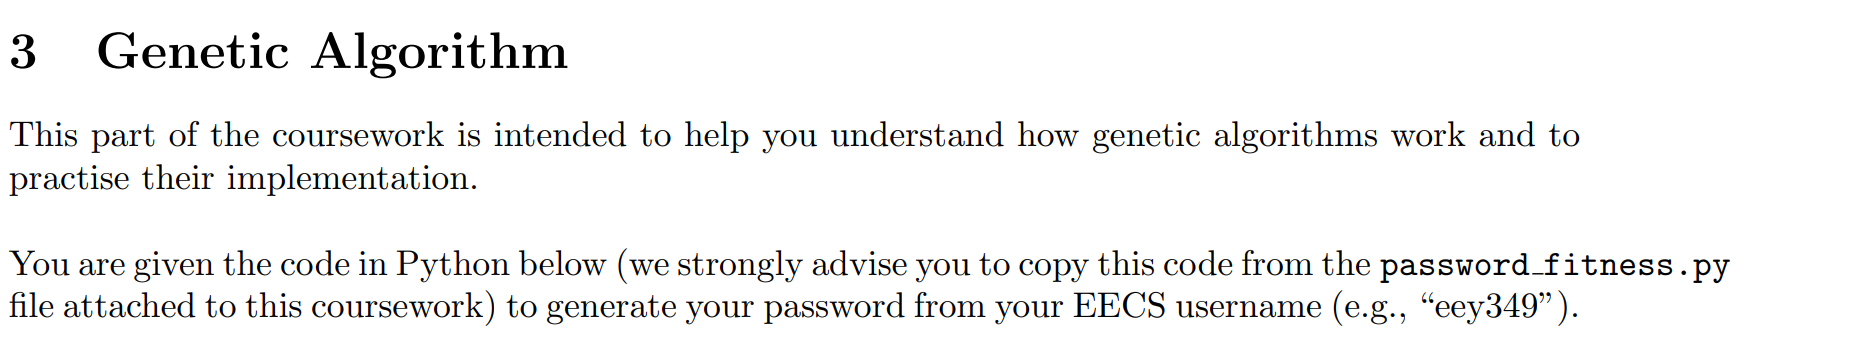

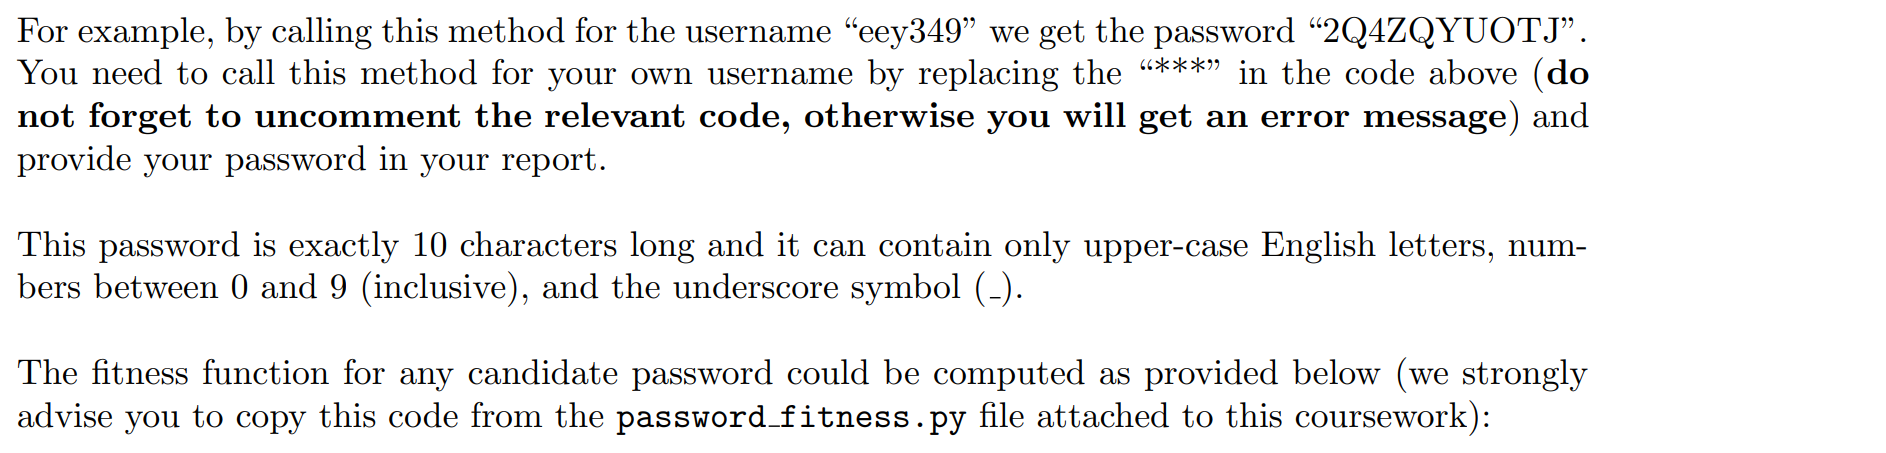

In [1]:
import math
import hashlib
import string

def get_password(student_username, l=10):
    # Possible characters include upper-case English letters, numbers between 0 and 9 (inclusive), 
    # and the underscore symbol
    options = string.digits + string.ascii_uppercase  + "_"

    h = hashlib.sha256(("ECS759P-AI"+student_username).encode("utf-8"))
    d = h.digest()
    s = ""
    for n in d:
      s += options[n%len(options)]

    return s[0:l]

# TO DO: replace *** with your EECS username and uncomment the code
student_password = get_password('ec23752')
print(student_password)

# Distance function
def distance_function(string_one, string_two):
    score = 0
    for i, j in zip(string_one, string_two):
        # Square of the absolute difference between two Unicode codes
        score += math.sqrt(abs(ord(i) - ord(j)))
    return score


# Upper bound of the distance value
MAX_VALUE = distance_function('0000000000', '__________')

# Compute normalised fitness for a list of candidate passwords 
def get_normalised_fitness(list_of_phrases, student_password):
    ordered_dict = dict()
    phrase_to_find = student_password
    for phrase in list_of_phrases:
        # Return 1 when a candidate matches the true password (string distance between them is zero)
        ordered_dict[phrase] = 1 - distance_function(phrase, phrase_to_find) / MAX_VALUE
    return ordered_dict

# Example of how to get fitness values for a list of candidates
get_normalised_fitness(['2Q4HHHHOTJ', '2HHZQYUOTJ'], student_password)

RBPI951WUT


{'2Q4HHHHOTJ': 0.47722338850461055, '2HHZQYUOTJ': 0.4318914343957473}

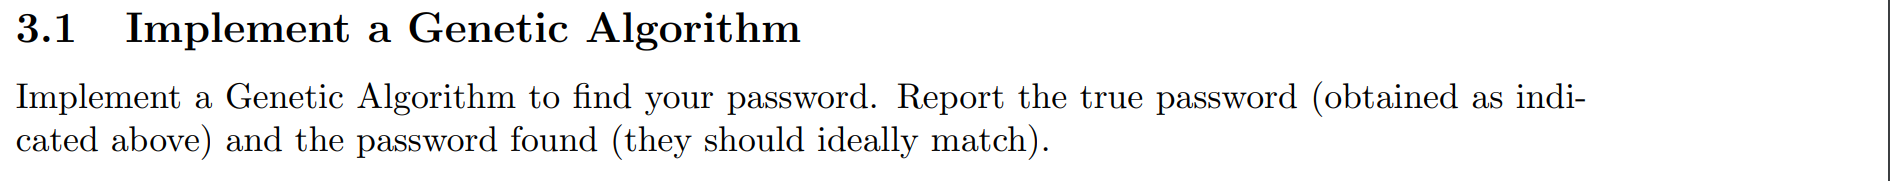

In [2]:
import random, copy
# from random import choices, randrange, random

# representing each genome by a class called Genome 

class Genome:
    
    # constructor function, create instance of class by passing the length of the password
    # child_pass option is for cases that we want to generate genome from the password that we already know like crossover
    # if we dont know the password we randomly pick character from acceptable characters for 10 times 
    
    def __init__(self, length, child_pass=None):
        # acceptable characters
        self.options = string.ascii_uppercase + string.digits + '_'
        
        if child_pass == None:
            # if we dont know the password we pick random chars from acceptable chars for 10 times and create a string
            
            self.password = ''.join(self.generate_char() for _ in range(length))
    
        else:
            # else we fill the password with given password
            self.password = child_pass
            
    def generate_char(self):
        # we randomly pick a char from acceptable characters
        return random.choice(self.options)
    
    #mutation function
    def mutation(self, probability, show_alerts = False):
        # save old password for comparison
        old_pass = self.password
        
        # for each character of the password 
        for index in range(len(self.password)):
            # we generate random number and compare it with mutation probability 
            if random.random() <= probability:
                # if it is less or equal we generate a new char
                new_char = self.generate_char()
                # we replace the selected char with the new char in the string
                self.password = self.password[:index] + new_char + self.password[index + 1:]
                
        # if this operation does not change the password we print a warning
        if old_pass == self.password:
            if show_alerts:
                print("Alert mutation generate the same answer ")
            
    # when print function called on the object of this class, it prints the password value of that object
    def __str__(self):
        return self.password

In [3]:
# crossover two given genomes A and B
def crossover(genome_a, genome_b, show_alerts = False):
    
    # we check if length of genomes password is same or not and if they are longer than 2 
    #(for debugging since in our case all of them are 10 chars)
    
    if len(genome_b.password) == len(genome_a.password) and len(genome_a.password) > 2 :
        # we pick a random position for doing crossover
        random_number = random.randrange(1, len(genome_a.password)-1)
        # combine first part of each genome password with other part of other genome and create 2 new passwords
        password_a = genome_a.password[0:random_number] + genome_b.password[random_number:]
        password_b = genome_b.password[0:random_number] + genome_a.password[random_number:]
        # create a set of children and parents passwords for comparison
        children = {password_a, password_b}
        parents = {genome_b.password, genome_a.password}
        
        
        # if children and parents sets have common element it means that crossover generates 
        #exact same answer and we alert it
        if children.isdisjoint(parents) == False:
            if show_alerts:
                print("Alert crossover generate the same answer")
                print(random_number, children, parents, children.intersection(parents))
            
        # create genomes of crossover passwords and return them
        return Genome(10,password_a), Genome(10, password_b)

    return None

In [4]:
# performs crossover on list of genomes named pool to cross
def crossing_over(pool_to_cross, pCO, show_alerts = False):
  # for each genome in pool
  for index, genome_a in enumerate(pool_to_cross):
    
   # generate a random number and compare it with crossover probability
    if random.random() <= pCO:
      # if it is less or equal
      # We get the list of all the other selected genomes
      others = pool_to_cross[:]
      others.remove(genome_a)
      # We pick randomly one of them
      genome_b = random.choice(others)
      # We get its index in order to modify it directly
      genome_b_index = pool_to_cross.index(genome_b)
      # we get their crossover genomes
      c_a, c_b = crossover(genome_a, genome_b, show_alerts)
        
      # we get all other genes passwords
      all_other_passwords=[gene.password for gene in others]
      # we check if new genomes passwords are unique or not
      if c_a.password not in all_other_passwords and c_b.password not in all_other_passwords:
        # if they are unique we replace them in the index of their parents
        pool_to_cross [index] = c_a
        pool_to_cross [genome_b_index] = c_b
        # otherwise we refuse to do crossover
      else:
        if show_alerts:
            print("Crossover refused due to repetitive password!")

  return pool_to_cross

In [5]:
# returns a list of Genomes for a given number with length 10
def create_population(number):
    
    population = []
    
    for i in range(number):
        
        population.append(Genome(10))
        
    return population


# since we have array of Genome objects we want to find Genome from a list from given password

def get_object_of_key(population, password):
    # we return the element of the population which has the same password
    for elem in population:
        if elem.password == password:
            return elem

# we sort the population using fitness value
def sort_population(population, target_password = student_password, show_results = False):
    
    passwords = []
    
    # first we create list of passwords of genomes from population in order to pass to fitness function
    
    for genome in population:
        
        passwords.append(genome.password)
    
    # we get a dictionary of each password and its fitness 
    passwords_weights = get_normalised_fitness(passwords, target_password)
    
    # we create a list of genome object (of that password) and its fitness
    
    combined_list = []
    
    for p , w in passwords_weights.items():
        combined_list.append((get_object_of_key(population, p),w))
    
    # we sort our list using fitness values in descending order

    sorted_list = sorted(combined_list, key=lambda x: x[1], reverse=True)

    # we return sorted genes and sorted fitnesses and print them
    
#     if show_results:
#         print(sorted_list)
    
    sorted_genes = []
    sorted_fitnesses = []
    
    for gene, fitness in sorted_list:
        
        sorted_genes.append(gene)
        sorted_fitnesses.append(fitness)
        
        if show_results:
            print(gene, fitness)
            
    if show_results:
        print("\n{} genomes\n".format(len(sorted_genes)))
    
    return sorted_genes, sorted_fitnesses

In [6]:
# run genetic algorithm for given hyperparamters
def run_evolution(population_size, fitness_limit: int = 1, generation_limit: int = 400, pMuta = 0.05, pCO = 0.8, show_results = False):
    # we create a population for given size
    population = create_population(population_size)
    if show_results:
        print("FIRST GENERATION\n\n")
    # sort the population
    population, population_fitnesses = sort_population(population, show_results= show_results)
    # find the half of the population size
    half = int(population_size / 2)

    # for eaxh generation
    for i in range(generation_limit):
          # copy half of best parents
          mating_pool = copy.deepcopy(population)[:half]
          # perform cross over and mutation over the best parents
          mating_pool = crossing_over(mating_pool, pCO, show_alerts = show_results)

          for gene in mating_pool:

                gene.mutation(pMuta, show_alerts = show_results)

          # combine the best of parents and offsprings to form a new population
          if show_results:
              print("\n\nGENERATION {}\n".format(i+1))
            
          population = copy.deepcopy(population)[:half] + mating_pool
          # Sort population according to fitness
          population, population_fitnesses = sort_population(population, show_results= show_results)
        
          # if best memeber of sorted population has fitness 1 you find the password and you stop the process
          # and you return the generation number that you find the password 
          if population_fitnesses[0] == fitness_limit:
                
                print("Answer found on generation {} \nPassword is {}".format(i+1, population[0].password))
                return i+1

      
    ##population, population_fitnesses = sort_population(population)   
    
    return generation_limit 

In [7]:
run_evolution(population_size = 100, show_results = True)

FIRST GENERATION


UBT2F71ZFQ 0.6953648725412431
RAAP6TETXX 0.6389143146686513
EMXJ3Q1RNO 0.6264473005970284
RAYD2A5JAF 0.6183403767247986
ND7C9P6ZM_ 0.6182271722600772
17V8BE5TWT 0.5947863654973056
O8FTKW0WVA 0.5944118532147213
YA0V8B0IGO 0.5881780441377396
IXJP421A2R 0.580281003328949
JVKF78NEJW 0.5756579200295086
ZZSIC761CN 0.5751162689980012
9GHW84A_GJ 0.569136481015533
JMHRGVUWTR 0.5642441987409157
E2WW72G9RU 0.5618373702209087
AIRMKA6W3C 0.561239005571904
UKEU29NIYK 0.558242757500306
F93E95LZF3 0.5566431301320933
PFAR5F3CL6 0.551116860163546
J6YMM1FGQZ 0.550783522104206
QC3SSBPYES 0.5444054141856032
SBXK3TAG2C 0.543455993252361
WFYF26VU26 0.5404647202454904
JNQ8L5_OLG 0.5333656148530832
VVXJG3XLJF 0.5321185085243423
AC_N2T6QCE 0.5296312860489972
6E1PJ1JPQV 0.5271036612499194
QOVXE4K0YD 0.5224942707926314
Y86G0XSIYT 0.5214176760013787
DQHC0OA_NZ 0.519881802522957
Y7XGJMBR2R 0.5198624964800898
NOJTL_2Z1P 0.5194717619497218
HXITD4DR1O 0.5191891783991103
N3R70HGR4V 0.5190248282994612

4 {'RASIC7UWTR', 'RASICA5WTR'} {'RASIC7UWTR', 'RASICA5WTR'} {'RASIC7UWTR', 'RASICA5WTR'}
Crossover refused due to repetitive password!
Alert crossover generate the same answer
2 {'RASIC7ERSO', 'RATGF_2WWT'} {'RASIC7ERSO', 'RATGF_2WWT'} {'RASIC7ERSO', 'RATGF_2WWT'}
Crossover refused due to repetitive password!
Alert mutation generate the same answer 
Alert mutation generate the same answer 
Alert mutation generate the same answer 
Alert mutation generate the same answer 
Alert mutation generate the same answer 
Alert mutation generate the same answer 
Alert mutation generate the same answer 
Alert mutation generate the same answer 
Alert mutation generate the same answer 
Alert mutation generate the same answer 
Alert mutation generate the same answer 
Alert mutation generate the same answer 
Alert mutation generate the same answer 
Alert mutation generate the same answer 
Alert mutation generate the same answer 
Alert mutation generate the same answer 
Alert mutation generate the same 

RBSI671RWT 0.875597631232985
RASI271WOT 0.8651987889931163
RASI472WTR 0.8571026914156122
RBRM675WWT 0.854504170993319
RASI672TWT 0.8537764789540827
RBRM471ZWT 0.8510607656402258
UBSI572WTR 0.8498680382864993
RASI572TWT 0.8498680382864993
RASN271WWT 0.8476834404657931
RAOJC75WWT 0.8396840939992567
RASI474ZWT 0.8357465744512
OASI671RWT 0.8357465744511999
RAUI271ZPT 0.8356954617382969
SBSP671YWT 0.8344068615612938
RASI572OWT 0.8338757460681432
RASD271WTR 0.8330969413160036
SASIC71ZWT 0.832914476184634
RALI474ZWT 0.8318381337836167
RAOJC71ZPT 0.8316045559393438
RAOI572TXX 0.8267369657623068
RASIH71ZPT 0.8251462887217682
RASF675WTR 0.8246034806545037
RASIF21TTR 0.8218125332651808
RAOJ2A1ZWT 0.821226155480071
UBTE675WWT 0.8206950399869204
RASP671YTR 0.8198203624115044
RASIH72XTR 0.8186393276318916
RCSD272WTR 0.8185104421662143
SBSD272WTR 0.8185104421662143
NCSIC71ZWT 0.8183279770348445
RAYI271ZVQ 0.8173177148124877
UBTE471ZWT 0.8172516346338272
RATE675WTR 0.8167865993193371
RASF672ZPT 0.8165

RBSI671YWT 0.8875856099604813
RASI691WST 0.8850829623614647
RBRM671WWT 0.883677169292898
RASI371WWT 0.8831626133173385
RBSI671ZWT 0.8829494772536616
RAPI472WTR 0.8823672490476078
RBSI671WJT 0.8804645151261433
RAOJ371WWT 0.879254172649755
RBRI685WWT 0.8790410365860782
RASI671WTR 0.8790410365860782
RASI672WWT 0.8790410365860782
RASI671WOT 0.8785264806105187
RBRI682WOT 0.8785264806105187
RBRJ472WWT 0.8763253232722213
RBSI671RWT 0.875597631232985
RBUIF71WST 0.8735343758828984
RBRJ7A1WWT 0.8729991108106918
RASI472WWT 0.8716891905654017
RARE671WWT 0.8690906701431085
RBRM672WWT 0.8690906701431085
RBKI572WTR 0.8677807498978183
RBIJ271WWT 0.8669721525010629
RBSI671OWT 0.8669571850353054
RCSI271WTR 0.8657133449686758
RASI272WWT 0.8657133449686758
RASI271WTR 0.8657133449686758
RBOJ271ZWT 0.8657133449686758
RASI271WOT 0.8651987889931163
RASI681ZWT 0.8637268453970524
RASI671RWT 0.8610111320831956
RASI471ZWT 0.8610111320831956
RASI572WOT 0.8600315407931459
RASI685WWT 0.859818404729469
RASI682WOT 0.8

RB_I671WWT 0.8769853242310495
RBRJ472WWT 0.8763253232722213
RBSI671RWT 0.875597631232985
RCSI681WOT 0.873890347903699
RASI371WOT 0.8680615581919895
RBKI671ZYT 0.867053057858582
RASE671WWT 0.8644545374362888
RBSI682WJT 0.8612418832695341
RASI671RWT 0.8610111320831956
RBSIK81WOT 0.8518561299099565
RBSA671WOT 0.8518561299099564
RASIF70WST 0.851713223603996
RAPI871WW6 0.8496766056563733
R4SI681WWT 0.8490002198878559
HAOI671WTR 0.84359253466684
R_OI671WST 0.8403413914871196
RBRM681WWK 0.8352815391367099
RYOI681WTR 0.8297150690739197
R0OM671WST 0.8278338202927567
RBSI671WT0 0.8267369657623068
RB4I472WPT 0.8223677701208945
RYRJ471WWT 0.8209574299846764
RV_I671WWT 0.8117525169257053
RCSI37IWWT 0.8117036532162888
RASI672AWT 0.8106242910932546
QDR9671WOT 0.8041881917930047
RALI671W2R 0.8034242023420152
RBRI6855ST 0.793987861729454
RASI691CS_ 0.7714722103714308
RAPI67H9OT 0.7539430996114838
RA5J6719TR 0.7340318759786015

92 genomes

Alert crossover generate the same answer
5 {'RAPI671WWT', 'RBSI6

RAPI671WWT 0.9188920933678633
RBOI671WWT 0.9188920933678633
RBSI871WWT 0.9188920933678633
RBSI871WST 0.9188920933678633
RBOJ871WWT 0.9149836527002799
RBOI681WWT 0.9142559606610435
RAPI681WWT 0.9142559606610435
RBOI9A1WWT 0.9142559606610435
RBRI671WWT 0.9128501675924768
RBOI471WWT 0.9115402473471867
RAPI471WST 0.9115402473471867
RAPI471WWT 0.9115402473471867
RBSI891WST 0.9103475199934602
RBRI871WTR 0.9089417269248935
RAPI371WWT 0.908427170949334
RBSI671WWT 0.9082140348856571
RBSI671WST 0.9082140348856571
RBRI681WST 0.9082140348856571
RAPI671WPT 0.906904114640367
RAOI671WWT 0.9043055942180738
RBTI671WWT 0.9043055942180738
RBSJ871WST 0.9043055942180738
RBSJ871WWT 0.9043055942180738
RBOI671WOT 0.9037910382425143
RBSI681WST 0.9035779021788375
RBSI681WWT 0.9035779021788375
RBOI491WST 0.9029956739727837
RBOI491WWT 0.9029956739727837
RBSI261WWT 0.9009282690436411
RAOJ871WWT 0.9003971535504904
RBTI571WWT 0.9003971535504904
RBRI681WYT 0.899669461511254
RBRI271WWT 0.8995224759750744
RBRI271WST 0.

RBRI68NWWT 0.8296633330049136
RPTI671WWR 0.8290994870019164
RXOO491WST 0.7988494484294353

76 genomes

Crossover refused due to repetitive password!
Crossover refused due to repetitive password!
Alert crossover generate the same answer
7 {'RAPI471WST', 'RAPI871WST'} {'RAPI471WST', 'RAPI871WST'} {'RAPI471WST', 'RAPI871WST'}
Crossover refused due to repetitive password!
Alert crossover generate the same answer
1 {'RBSI871WST', 'RAPI871WWT'} {'RBSI871WST', 'RAPI871WWT'} {'RBSI871WST', 'RAPI871WWT'}
Crossover refused due to repetitive password!
Alert crossover generate the same answer
1 {'RBOI671WRT', 'RBPI471WWT'} {'RBOI671WRT', 'RBPI471WWT'} {'RBOI671WRT', 'RBPI471WWT'}
Crossover refused due to repetitive password!
Alert crossover generate the same answer
6 {'RBPI371WWT', 'RBPI471WWT'} {'RBPI371WWT', 'RBPI471WWT'} {'RBPI371WWT', 'RBPI471WWT'}
Crossover refused due to repetitive password!
Alert crossover generate the same answer
7 {'RBRI681WST', 'RBOI891WST'} {'RBRI681WST', 'RBOI891WST'} 

RBSI871WST 0.9188920933678633
RBOI671WST 0.9188920933678633
RAPI671WST 0.9188920933678633
RBOIC51WWT 0.9186585155235905
RBOI452WST 0.9175821731225731
RBOI452WWT 0.9175821731225731
RBPI491WST 0.9175821731225731
RBPIA71WWT 0.9174863002992966
RBOJ871WWT 0.9149836527002799
RAPI871XST 0.9149836527002799
RBOI681WWT 0.9142559606610435
RAPI681WWT 0.9142559606610435
RBOI9A1WWT 0.9142559606610435
RBOI681WST 0.9142559606610435
RBOI671WRT 0.9142559606610435
RAPI9A1WWT 0.9142559606610435
RAPI681WST 0.9142559606610435
RCPI681WST 0.9142559606610435
RBPI471WZT 0.9141387677694799
RBRI671WWT 0.9128501675924768
RBRI671WST 0.9128501675924768
RBPI671WWV 0.9128501675924768
RAPI261WWT 0.9116063275258472
RBOI471WWT 0.9115402473471867
RAPI471WST 0.9115402473471867
RAOI652WWT 0.9103475199934602
RBOI871WWW 0.9043055942180738
RAPI871XWS 0.9003971535504904
RBWI681WWT 0.890250210561435
RBOIT51WWT 0.888991403029048
RBOIN71WST 0.8773129145215396
RBOI9Z1WWT 0.8760588654484686
RBPIN71WWV 0.8712709887461532
RBOI471WWK 0

RBPI471WST 0.9261267464969761
RBOI652WST 0.9249340191432497
RBOI881WST 0.9249340191432497
RBPI691WST 0.9249340191432497
RBOI652WWT 0.9249340191432497
RBTI651WST 0.9249340191432497
RBOI771WWT 0.923528226074683
RAPI771WWT 0.923528226074683
PBPI871WST 0.923528226074683
PBPI871WWT 0.923528226074683
RBPI371WWT 0.9230136700991235
RBPI371WST 0.9230136700991235
RAPI651WWR 0.9188920933678633
RBOI671WST 0.9188920933678633
RBPID61WWT 0.916407131240345
RAPI681WWT 0.9142559606610435
RCPI873WWT 0.9089417269248935
RBOI371WWT 0.908427170949334
RBOI651RST 0.906904114640367
HBPI671WWT 0.8873520321162085
RAPP652WST 0.8863417698938516
RBFI452WST 0.8860421118709183
RBOI351NST 0.8852960984251415
RBOI852W9T 0.8790560040518357
RBPI891FWT 0.8754704009228916
RBOI871IWT 0.8749924695590878
RBPI371WWH 0.8724845548351323
R1OG851WWT 0.8694284751475052
RBP1671WST 0.8620196324166031
RBPI4514WT 0.8604602786958828
RA4I451WWT 0.8549841737735666
RARIQ71WST 0.8520692659736333
RAPI87OWST 0.8496766056563733
RBPAQ71WST 0.8460

8 {'RBPI851WZT', 'RBPI851WWT'} {'RBPI851WZT', 'RBPI851WWT'} {'RBPI851WZT', 'RBPI851WWT'}
Crossover refused due to repetitive password!
Alert crossover generate the same answer
6 {'RAPI951WWT', 'RAPI861WWT'} {'RAPI951WWT', 'RAPI861WWT'} {'RAPI951WWT', 'RAPI861WWT'}
Crossover refused due to repetitive password!
Alert crossover generate the same answer
1 {'RBPI851WST', 'RBOI652WUT'} {'RBPI851WST', 'RBOI652WUT'} {'RBPI851WST', 'RBOI652WUT'}
Crossover refused due to repetitive password!
Crossover refused due to repetitive password!
Alert crossover generate the same answer
2 {'RBPI971WWT', 'RBOI671WUT'} {'RBPI971WWT', 'RBOI671WUT'} {'RBPI971WWT', 'RBOI671WUT'}
Crossover refused due to repetitive password!
Crossover refused due to repetitive password!
Crossover refused due to repetitive password!
Crossover refused due to repetitive password!
Crossover refused due to repetitive password!
Alert crossover generate the same answer
1 {'RBPI851WZT', 'RAPI451WTT'} {'RBPI851WZT', 'RAPI451WTT'} {'RBPI

48

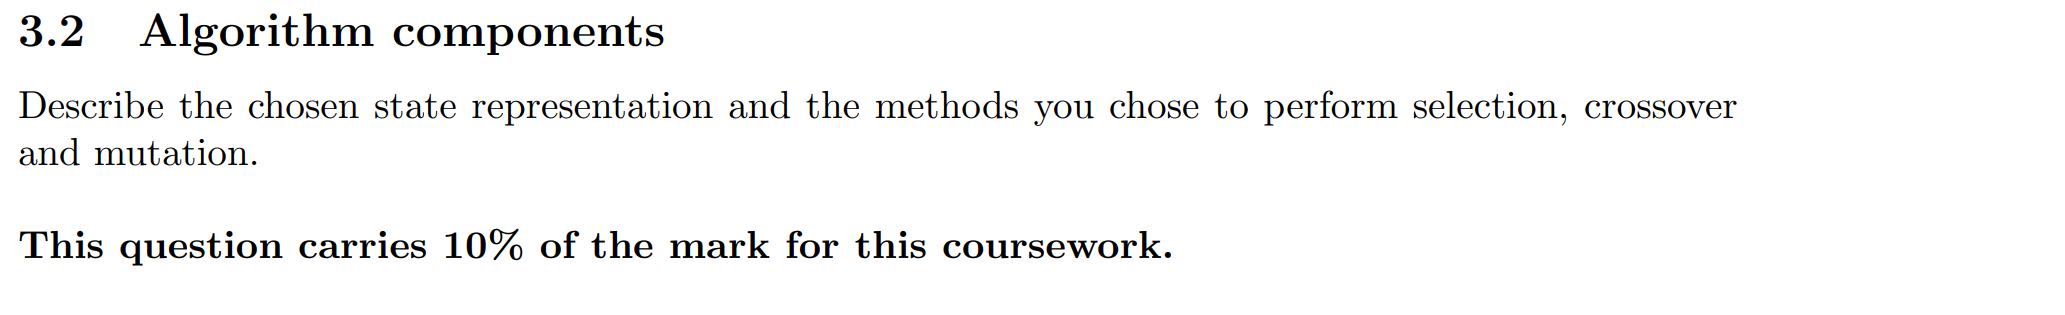

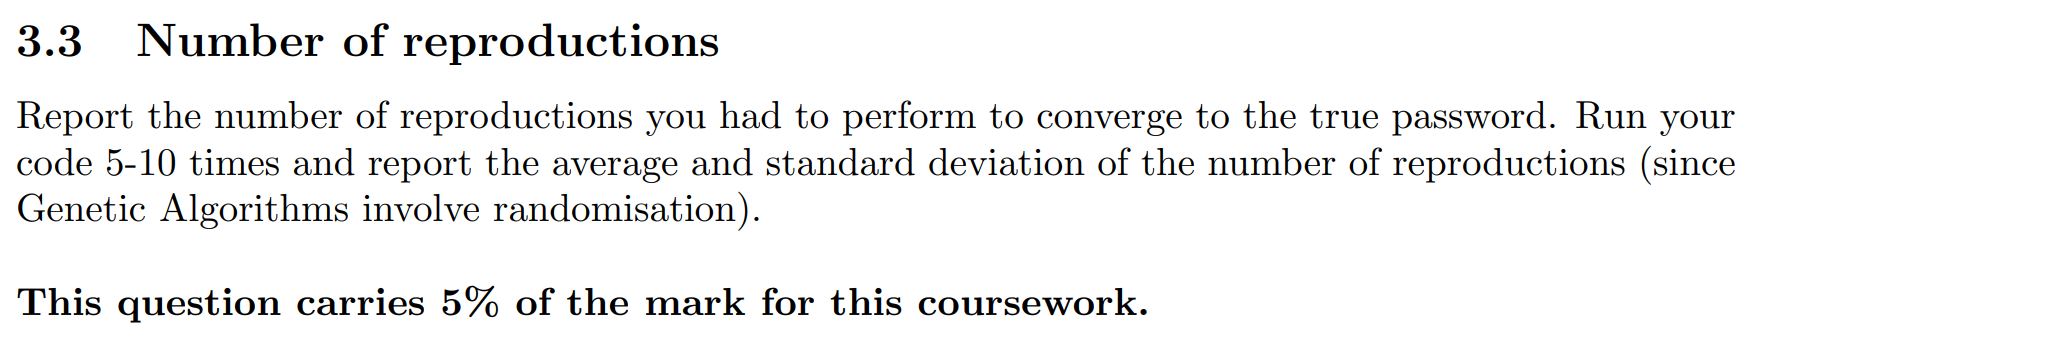

In [8]:
#calculate_standard_deviation
def calculate_standard_deviation(reproductions, average, turns):
    
    res = sum([(rep - average) ** 2 for rep in reproductions])
   
    return (res/turns)** 0.5
        
        

In [9]:
# we run the algorithm with same hyperparameters for given turns and record number of reproductions in a list
# we calculate the average and standard deviation of number
# of reproductions list and return it
def run_algorithm_for_given_turns(turns, population_size, show_results = False):

    reproductions = []

    for i in range(turns):

       reproduction_number = run_evolution(population_size, show_results=show_results)
       reproductions.append(reproduction_number)
        
    average = sum(reproductions) / turns
    standard_deviation = calculate_standard_deviation(reproductions, average, turns) 
    print(average, standard_deviation)      

    return reproductions, average, standard_deviation

In [10]:
reproductions, average, standard_deviation = run_algorithm_for_given_turns(10, 100, show_results = False)

Answer found on generation 79 
Password is RBPI951WUT
Answer found on generation 81 
Password is RBPI951WUT
Answer found on generation 45 
Password is RBPI951WUT
Answer found on generation 81 
Password is RBPI951WUT
Answer found on generation 57 
Password is RBPI951WUT
Answer found on generation 89 
Password is RBPI951WUT
Answer found on generation 80 
Password is RBPI951WUT
Answer found on generation 53 
Password is RBPI951WUT
Answer found on generation 57 
Password is RBPI951WUT
Answer found on generation 118 
Password is RBPI951WUT
74.0 20.445048300260872


reproductions in 10 times running [79, 81, 45, 81, 57, 89, 80, 53, 57, 118]
average 74.0 standard_deviation 20.445048300260872


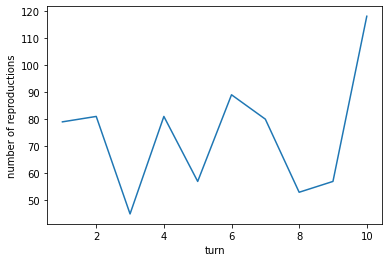

In [11]:
#plot the number of reproductions and the turns 
import matplotlib.pyplot as plt
plt.plot(list(range(1, 11)), reproductions)
plt.ylabel("number of reproductions")
plt.xlabel("turn")
print("reproductions in 10 times running",reproductions)
print("average {} standard_deviation {}".format(average, standard_deviation))

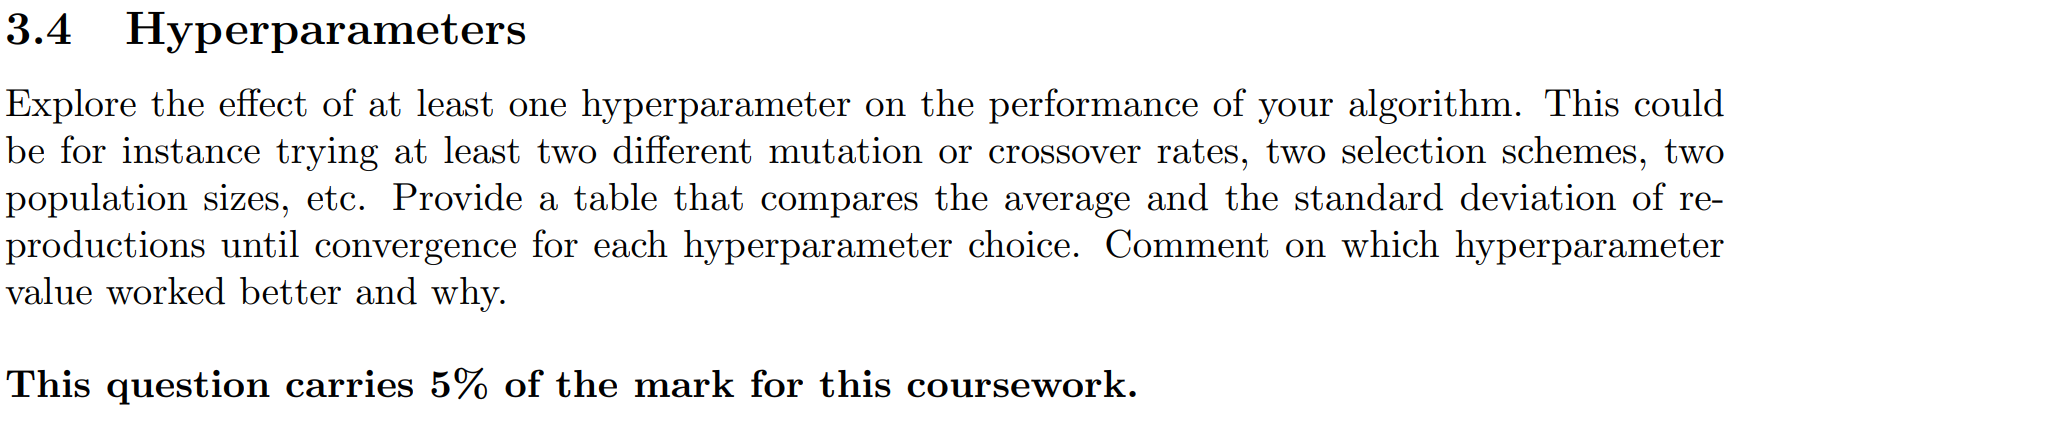

In [12]:
#generate population sizes
population_sizes = list(range(100,250,10))
print(population_sizes)

[100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240]


In [13]:
averages = []
standard_deviations = []
# for each population size we run the genetic algorithm for 5 times and record the average and standard deviation in lists
for size in population_sizes:

    reproductions, average, standard_deviation = run_algorithm_for_given_turns(5, size, show_results = False)
    
    averages.append(average)
    standard_deviations.append(standard_deviation)

Answer found on generation 91 
Password is RBPI951WUT
Answer found on generation 90 
Password is RBPI951WUT
Answer found on generation 32 
Password is RBPI951WUT
Answer found on generation 79 
Password is RBPI951WUT
Answer found on generation 42 
Password is RBPI951WUT
66.8 24.894979413528343
Answer found on generation 58 
Password is RBPI951WUT
Answer found on generation 54 
Password is RBPI951WUT
Answer found on generation 53 
Password is RBPI951WUT
Answer found on generation 96 
Password is RBPI951WUT
Answer found on generation 61 
Password is RBPI951WUT
64.4 16.057397049335236
Answer found on generation 29 
Password is RBPI951WUT
Answer found on generation 85 
Password is RBPI951WUT
Answer found on generation 41 
Password is RBPI951WUT
Answer found on generation 32 
Password is RBPI951WUT
Answer found on generation 36 
Password is RBPI951WUT
44.6 20.597087172704786
Answer found on generation 44 
Password is RBPI951WUT
Answer found on generation 65 
Password is RBPI951WUT
Answer fou

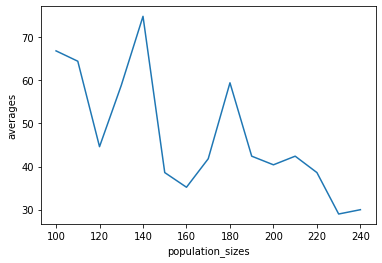

In [14]:
plt.plot(population_sizes, averages)
plt.xlabel("population_sizes")
plt.ylabel("averages")
plt.show()

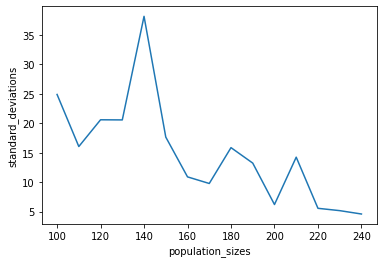

In [15]:
plt.plot(population_sizes, standard_deviations)
plt.xlabel("population_sizes")
plt.ylabel("standard_deviations")
plt.show()

In [16]:
# create a table to compare the impact of different population sizes on average and standard deviation values
print("size  average  standard_deviation")
for i, size in enumerate(population_sizes):
    print(size, averages[i],standard_deviations[i])

size  average  standard_deviation
100 66.8 24.894979413528343
110 64.4 16.057397049335236
120 44.6 20.597087172704786
130 58.8 20.575713839378697
140 74.8 38.15442307256132
150 38.6 17.658992043715294
160 35.2 10.906878563548783
170 41.8 9.785703858180055
180 59.4 15.869467539901898
190 42.4 13.245376551838758
200 40.4 6.216108107168021
210 42.4 14.249210504445502
220 38.6 5.571355310873647
230 29.0 5.176871642217914
240 30.0 4.604345773288535


In [17]:
# !pip install tabulate

In [18]:
from tabulate import tabulate

data = list(zip(population_sizes, averages, standard_deviations))
table = tabulate(data, headers=["Size", "Average", "Standard Deviation"], tablefmt="pretty")

print(table)

+------+---------+--------------------+
| Size | Average | Standard Deviation |
+------+---------+--------------------+
| 100  |  66.8   | 24.894979413528343 |
| 110  |  64.4   | 16.057397049335236 |
| 120  |  44.6   | 20.597087172704786 |
| 130  |  58.8   | 20.575713839378697 |
| 140  |  74.8   | 38.15442307256132  |
| 150  |  38.6   | 17.658992043715294 |
| 160  |  35.2   | 10.906878563548783 |
| 170  |  41.8   | 9.785703858180055  |
| 180  |  59.4   | 15.869467539901898 |
| 190  |  42.4   | 13.245376551838758 |
| 200  |  40.4   | 6.216108107168021  |
| 210  |  42.4   | 14.249210504445502 |
| 220  |  38.6   | 5.571355310873647  |
| 230  |  29.0   | 5.176871642217914  |
| 240  |  30.0   | 4.604345773288535  |
+------+---------+--------------------+
